## 0.Import Libraries

In [ ]:
# Importing important libraries for our project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf 

In [ ]:
# Check tensorflow version
tf.__version__

'2.9.2'

## 1.Import Dataset

In [ ]:
try:
  # Load train dataset
  df = pd.read_csv('BBC News Train.csv')
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
try:
  # Factorize the category label with numeric label
  df['category_id'] = df.Category.factorize()[0]
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Check head
df.head()

,ArticleId,Text,Category,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [ ]:
# Check tail
df.tail()

,ArticleId,Text,Category,category_id
1485,857,double eviction from big brother model caprice...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,4
1487,1590,weak dollar hits reuters revenues at media gro...,business,0
1488,1587,apple ipod family expands market apple has exp...,tech,1
1489,538,santy worm makes unwelcome visit thousands of ...,tech,1


## 2.Exploratory Data Analysis

In [ ]:
# Value counts for category column
df.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [ ]:
# Null values
df.isna().sum()

ArticleId      0
Text           0
Category       0
category_id    0
dtype: int64

In [ ]:
# Drop na values if they are
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
# Null values
df.isna().sum()

ArticleId      0
Text           0
Category       0
category_id    0
dtype: int64

Explore the category count: 
AxesSubplot(0.125,0.125;0.775x0.755)


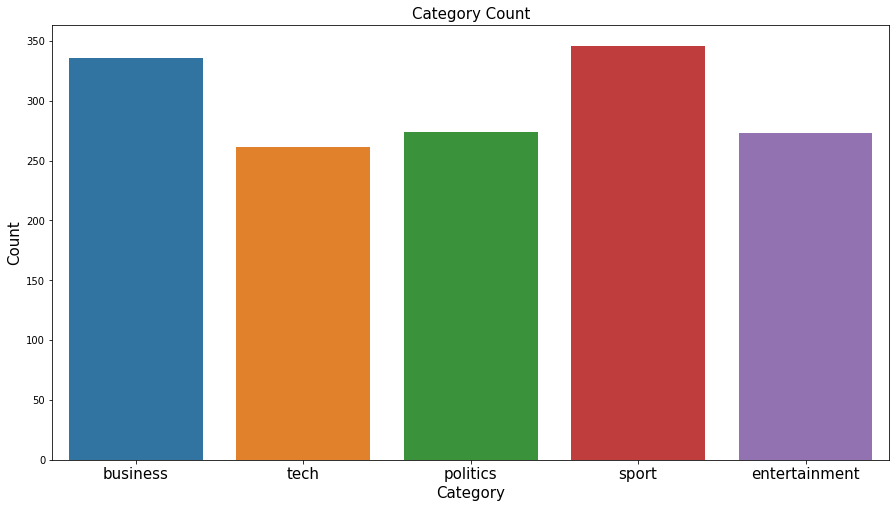

In [ ]:
# Plot the category count
import seaborn as sns 
try:
  plt.figure(figsize=(15,8))
  print(f'Explore the category count: \n{sns.countplot(x="Category", data=df)}')
  plt.title('Category Count',size=15)
  plt.ylabel('Count', size=15)
  plt.xlabel('Category', size=15)
  plt.xticks(size=15)
  plt.show();
except Exception as e:
  print(f'Error raised!!: {e}') 

## 3.Data Preprocessing

In [ ]:
# Create a functon 'preproces_text' for preprocessing of raw data
def preprocess_text(sen):
  try:
    # Lowercase
    sentence = sen.lower()
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Zäöüß]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
  except Exception as e:
   print(f'Error raised!!: {e}') 

# Apply function to our 'Text' column 
df.Text = df.Text.apply(preprocess_text)
   

In [ ]:
# Check examples after preprocessing of data
df['Text'].values[:2]

array(['worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers against battery of fraud charges have called company whistleblower as their first witness cynthia cooper worldcom ex head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in her warnings led to the collapse of the firm following the discovery of an bn bn accounting fraud mr ebbers has pleaded not guilty to charges of fraud and conspiracy prosecution lawyers have argued that mr ebbers orchestrated series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates but ms cooper who now runs her own consulting business told jury in new york on wednesday that external auditors arthur andersen had approved worldcom accounting in early and she said andersen had given green light to the procedures and practices used by worldcom mr ebber lawyers have said he was unaware of the frau

In [ ]:
# Independent and Dependent features
X = df['Text'].values
y = df['Category'].values

In [ ]:
# Split the 'Independent' and 'Dependent' values as train_test_split
X_train_sent, X_test_sent, y_train, y_test = train_test_split(X,
                                                              y,
                                                              test_size=0.20,
                                                              random_state=42)

### 3.1 Turn categorical values into numerical

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One hot encoder
try:
  # Initialize oneHotEncoder to our labels
  one_hot_encoder = OneHotEncoder(sparse=False)
  # Train labels
  y_train_one_hot =one_hot_encoder.fit_transform(y_train.reshape(-1,1))
  # Test labels
  y_test_one_hot = one_hot_encoder.transform(y_test.reshape(-1,1))
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label encoder
try:
  # Intialize label encoder to our labels
  label_encoder = LabelEncoder()
  # Train labels
  y_train_labels_encoded = label_encoder.fit_transform(y_train.reshape(-1,1))
  # Test labels
  y_test_labels_encoded = label_encoder.transform(y_test.reshape(-1,1))
except Exception as e:
  print(f'Error raised!!: {e}') 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Class names
class_names = label_encoder.classes_

In [ ]:
# Check first ten labelencoded train labels
y_train_labels_encoded[:10]

array([3, 0, 2, 3, 2, 0, 0, 1, 0, 1])

In [ ]:
# Check first ten labelencoded test labels
y_test_labels_encoded[:10]

array([1, 2, 2, 4, 4, 0, 4, 1, 0, 4])

### Create a baseline model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Creating a baseline model 
try:
  tf.random.set_seed(42)
  model_0 = Pipeline([
      ('tf-idf', TfidfVectorizer()),
      ('clf', MultinomialNB())
  ])
except Exception as e:
  print(f'Error raised!!: {e}') 


In [ ]:
try:
  # Fit our train sentences and train labels to our baseline model
  model_0.fit(X=X_train_sent,
              y=y_train_labels_encoded)
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
try:
  tf.random.set_seed(42)

  # Check baseline_model performance on test sentences and test labels
  print(f'Test Score: {model_0.score(X=X_test_sent,y=y_test_labels_encoded)}')
except Exception as e:
  print(f'Error raised!!: {e}') 

Test Score: 0.9563758389261745


In [ ]:
# Baseline model prediction labels
baseline_preds = model_0.predict(X_test_sent)
baseline_preds

array([0, 2, 2, 2, 3, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 2, 0, 3, 2, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 4, 2, 0, 1, 4, 3, 0, 2, 0,
       3, 0, 2, 4, 2, 0, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 4, 0, 2, 4, 4, 4,
       0, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 0, 2, 4, 0, 2, 4, 4, 1, 2, 1, 2, 1, 3, 4, 3, 2, 3, 0, 4,
       3, 0, 4, 1, 4, 0, 2, 0, 1, 0, 2, 3, 0, 2, 0, 0, 4, 4, 2, 1, 0, 3,
       1, 3, 0, 2, 0, 1, 0, 1, 0, 1, 4, 3, 1, 2, 0, 4, 2, 2, 3, 0, 4, 3,
       1, 4, 4, 3, 4, 3, 3, 2, 0, 0, 2, 2, 4, 3, 3, 4, 2, 4, 4, 1, 0, 4,
       1, 3, 0, 0, 3, 3, 4, 1, 1, 0, 4, 2, 1, 2, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 0, 3, 4, 4, 0, 0, 3, 2, 0, 1, 3, 2, 2, 3, 4, 2,
       3, 4, 0, 0, 1, 4, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 3, 1, 3, 2, 4, 3, 2, 4, 1, 3, 4, 0, 0, 2, 4, 4,
       4, 3, 3, 0, 2, 1, 3, 3, 4, 3, 3, 2, 3, 3, 0, 2, 3, 0, 0, 2, 0, 0,
       0, 4, 2, 1, 0, 0, 0, 0, 2, 1, 4, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Function for evaluation metrics to check our model performances
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, 
                                                                               y_pred, 
                                                                               average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Baseline model performance on different classification metrics
baseline_results = calculate_results(y_true = y_test_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 95.63758389261746,
 'precision': 0.9578462326169593,
 'recall': 0.9563758389261745,
 'f1': 0.9562455692796806}

### 3.2 Tokenizer and Padding

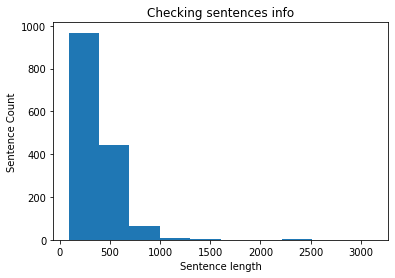

In [ ]:
sent_lens = [len(sent.split()) for sent in df['Text'].values]
# Counting how many sentences are having length more than 500 words using histogram
plt.hist(sent_lens, bins=10);
plt.title('Checking sentences info')
plt.xlabel('Sentence length')
plt.ylabel('Sentence Count')
plt.show();

In [ ]:
# 90 percentage of our sentences are having length of 
output_seq_len = int(np.percentile(sent_lens, 90))
output_seq_len

593

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Add tokens to our words and padding to the tokens according to sentence length.
def tokenizer_and_padding(X_train_sent, X_test_sent, max_features=10000):
  max_features=max_features
  # tokenizer
  tokenizer = Tokenizer(num_words=max_features)
  tokenizer.fit_on_texts(X_train_sent)
  # texts_to_sequences
  X_train = tokenizer.texts_to_sequences(X_train_sent)
  X_test = tokenizer.texts_to_sequences(X_test_sent)
  # pad_sequences
  X_train = pad_sequences(X_train, padding = 'post',maxlen=output_seq_len)
  X_test  =  pad_sequences(X_test, padding = 'post',maxlen=output_seq_len)
  return X_train, X_test, tokenizer



In [ ]:
# Get X_train and X_test sentences mapped to tokenizer and padding
X_train, X_test, tokenizer = tokenizer_and_padding(X_train_sent, X_test_sent)

In [ ]:
# Check first ten mapped X_train and X_test
X_train[:10], X_test[:10]

(array([[ 714, 4893,  945, ...,    0,    0,    0],
        [ 511, 2175,    6, ...,    0,    0,    0],
        [ 771,  221,  817, ...,    0,    0,    0],
        ...,
        [  46,  158,  875, ...,    0,    0,    0],
        [5356, 2990,  286, ...,    0,    0,    0],
        [3940,  535,  581, ...,    0,    0,    0]], dtype=int32),
 array([[   7, 2645,   58, ...,    0,    0,    0],
        [ 266,  138,   58, ...,    0,    0,    0],
        [1634,  661,  138, ...,    0,    0,    0],
        ...,
        [5055,    3, 3168, ...,    0,    0,    0],
        [3066, 6174,  190, ...,    0,    0,    0],
        [3095,  723, 1439, ...,    0,    0,    0]], dtype=int32))

In [ ]:
# Shape of X_train and X_test
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

x_train shape: (1192, 593)
x_test shape: (298, 593)


In [ ]:
import json
# Save our tokenizer layer which is used in prediction
try:
  tokenizer_json = tokenizer.to_json()
  with open('tokenizer.json', 'w', encoding='utf-8') as f:
      f.write(json.dumps(tokenizer_json, ensure_ascii=True))
except Exception as e:
  print(f'Error raised!!: {e}') 

### 3.3 Model Callbacks:TensorBoard (for model experiment tracking)

In [ ]:
import datetime
# Tensorboard callback
def tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback instand to store log files.
    
    Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
    
    Args:
      dir_name: target directory to store TensorBoard log files
      experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    
    """
    try:
      log_dir = dir_name + '/'+ experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
      tensorboard_callback = tf.keras.callbacks.TensorBoard(
          log_dir = log_dir
      )
      print(f"Saving TensorBoard log files to : {log_dir}")
      return tensorboard_callback 
    except Exception as e:
      print(f'Error raisded!!: {e}')

### 3.4 Function for plotting loss curves

In [ ]:
import matplotlib.pyplot as plt

# Plotlosscurves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

## 4.Data Modelling


### 4.1 Simple Baseline dense model

In [ ]:
# Hyperparameters
max_features = 10000
embedding_dims = 128
batch_size = 32
epochs = 10

In [ ]:
from tensorflow.keras import layers
# Model_1
try:
  model_1 = tf.keras.Sequential([
      layers.Embedding(max_features,
                      embedding_dims,
                      input_length=output_seq_len),
      layers.GlobalAveragePooling1D(),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(len(class_names), activation='softmax')
  ])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
try:
  # Compile simple dense model
  model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Simple dense model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 593, 128)          1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 256)               25856     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                        

In [ ]:
try:
  tf.random.set_seed(42)
  # Fit sentences and labels to our model
  model_1_history = model_1.fit(X_train, y_train_one_hot,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test_one_hot),
            callbacks=[tensorboard_callback(dir_name='Model_Tracking',
                                            experiment_name='simple_dense_model')])
except Exception as e:
  print(f'Error raised!!: {e}') 

Saving TensorBoard log files to : Model_Tracking/simple_dense_model/20221118-025715
Epoch 1/10
38/38 [==============================] - 3s 10ms/step - loss: 1.5719 - accuracy: 0.2651 - val_loss: 1.4848 - val_accuracy: 0.3289
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 1.2822 - accuracy: 0.4371 - val_loss: 1.0472 - val_accuracy: 0.5470
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.7765 - accuracy: 0.6846 - val_loss: 0.6362 - val_accuracy: 0.7416
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3999 - accuracy: 0.8951 - val_loss: 0.4756 - val_accuracy: 0.8456
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.1451 - accuracy: 0.9782 - val_loss: 0.3605 - val_accuracy: 0.8624
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0536 - accuracy: 0.9950 - val_loss: 0.2832 - val_accuracy: 0.9027
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0

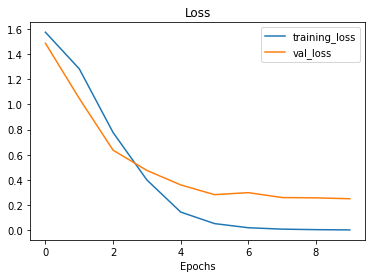

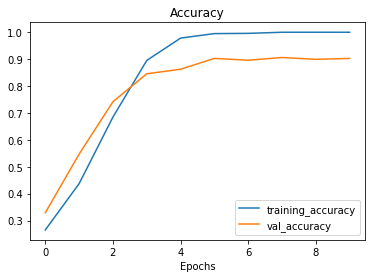

In [ ]:
# Check the model performance on both train and test dataset using graph
plot_loss_curves(model_1_history)

In [ ]:
# Evaluate on the test set
model_1.evaluate(X_test,y_test_one_hot)

10/10 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9027


[0.2507094442844391, 0.9026845693588257]

In [ ]:
# Get model prediction probabilities
model_1_pred_probs = model_1.predict(X_test)
model_1_pred_probs[:5]

10/10 [==============================] - 0s 2ms/step


array([[7.1737266e-01, 2.6850494e-02, 2.5478914e-01, 1.0435350e-06,
        9.8662777e-04],
       [3.0781623e-06, 7.6983042e-07, 9.9986792e-01, 5.1509869e-15,
        1.2824497e-04],
       [7.5959701e-06, 1.9410127e-05, 9.9996150e-01, 3.6192783e-13,
        1.1418212e-05],
       [1.3536451e-08, 6.5614365e-13, 7.4236123e-05, 1.4543073e-21,
        9.9992573e-01],
       [4.0392569e-01, 1.1195198e-02, 5.8010066e-01, 4.5985803e-07,
        4.7779428e-03]], dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction labels
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([0, 2, 2, 4, 2, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 2, 0, 1, 2, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 2, 1, 1, 1, 4, 3, 2, 2, 0,
       3, 0, 2, 4, 2, 0, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 4, 0, 1, 4, 4, 4,
       0, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 0, 2, 4, 0, 2, 4, 4, 1, 2, 1, 2, 1, 3, 4, 3, 2, 3, 0, 4,
       4, 0, 4, 1, 4, 0, 2, 0, 1, 0, 2, 3, 0, 2, 0, 0, 4, 4, 2, 1, 0, 3,
       1, 3, 4, 2, 0, 1, 0, 1, 0, 1, 4, 3, 1, 2, 4, 4, 2, 0, 3, 0, 2, 3,
       1, 4, 4, 3, 4, 3, 3, 2, 0, 4, 2, 2, 4, 1, 3, 4, 2, 4, 4, 1, 0, 2,
       1, 3, 0, 0, 3, 3, 4, 1, 2, 0, 4, 4, 1, 2, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 0, 3, 4, 4, 0, 4, 3, 2, 0, 1, 3, 2, 2, 3, 4, 2,
       3, 4, 0, 0, 1, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 1,
       2, 1, 0, 0, 1, 1, 3, 0, 1, 1, 4, 1, 2, 4, 1, 3, 4, 0, 0, 2, 2, 4,
       4, 3, 3, 0, 2, 1, 1, 1, 4, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0, 2, 0, 0,
     

In [ ]:
# Get the model results on evalution metrics
model_1_results = calculate_results(y_true=y_test_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 90.26845637583892,
 'precision': 0.9076351500848144,
 'recall': 0.9026845637583892,
 'f1': 0.9039718780421445}

### 4.2 Conv1D

In [ ]:
# Model 2 conv1d
try:
  model_2 = tf.keras.Sequential([
      # Embedding layer
      layers.Embedding(max_features,
                      embedding_dims,
                      input_length=output_seq_len),
      layers.Dropout(0.2),

      # Conv1D
      layers.Conv1D(filters=250,
                    kernel_size=3,
                    padding='valid',
                    activation='relu',
                    strides=1),
      # Pooling layer
      layers.GlobalMaxPooling1D(),
      layers.Dense(250, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(len(class_names), activation='softmax')
  ])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Compile
try:
  model_2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 593, 128)          1280000   
                                                                 
 dropout (Dropout)           (None, 593, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 591, 250)          96250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                      

In [ ]:
try:
  tf.random.set_seed(42)
  # Fit sentences and labels to our model
  model_2_history = model_2.fit(X_train,
                                y_train_one_hot,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(X_test,y_test_one_hot),
                                callbacks=[tensorboard_callback(dir_name='Model_Tracking',
                                                                experiment_name='Conv1D_Model')])
except Exception as e:
  print(f'Error raised!!: {e}') 

Saving TensorBoard log files to : Model_Tracking/Conv1D_Model/20221118-025722
Epoch 1/10
38/38 [==============================] - 7s 18ms/step - loss: 1.6019 - accuracy: 0.2257 - val_loss: 1.5494 - val_accuracy: 0.2148
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 1.3309 - accuracy: 0.5831 - val_loss: 0.8617 - val_accuracy: 0.7987
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.5241 - accuracy: 0.8658 - val_loss: 0.2224 - val_accuracy: 0.9530
Epoch 4/10
38/38 [==============================] - 0s 11ms/step - loss: 0.1521 - accuracy: 0.9572 - val_loss: 0.1196 - val_accuracy: 0.9698
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0508 - accuracy: 0.9908 - val_loss: 0.0953 - val_accuracy: 0.9664
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0247 - accuracy: 0.9966 - val_loss: 0.0818 - val_accuracy: 0.9698
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0

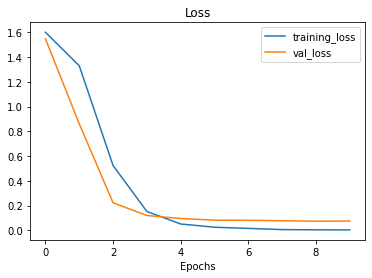

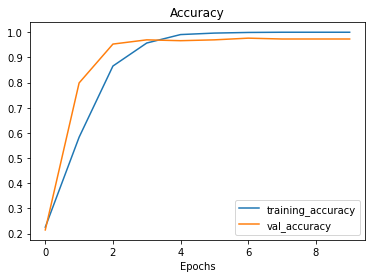

In [ ]:
# # Check the model performance on both train and test dataset using graph
plot_loss_curves(model_2_history)

In [ ]:
# Evaluate test data on the model
model_2.evaluate(X_test, y_test_one_hot)

10/10 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9732


[0.07495981454849243, 0.9731543660163879]

In [ ]:
# Get model prediction probabilities
model_2_pred_probs = model_2.predict(X_test)
model_2_pred_probs[:5]

10/10 [==============================] - 0s 3ms/step


array([[5.3021004e-03, 9.5159352e-01, 1.4727131e-02, 5.4713909e-04,
        2.7830038e-02],
       [6.6941686e-07, 3.3004622e-07, 9.9999905e-01, 2.2648270e-11,
        1.2762660e-09],
       [3.3803227e-07, 5.8008720e-07, 9.9999905e-01, 1.4510397e-09,
        2.8730340e-09],
       [7.7444484e-04, 3.7526927e-04, 1.5936644e-03, 2.7689402e-05,
        9.9722892e-01],
       [2.5430503e-03, 6.8013475e-04, 1.6656829e-03, 2.7351946e-01,
        7.2159165e-01]], dtype=float32)

In [ ]:
# Turn model prediction probabilities into prediction labels
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 2, 2, 4, 4, 0, 4, 1, 0, 4, 2, 1, 2, 3, 4, 4, 0, 3, 2, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 4, 2, 0, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 4, 2, 0, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 4, 0, 1, 4, 4, 4,
       0, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 2, 2, 4, 0, 2, 4, 4, 1, 2, 1, 2, 1, 3, 4, 3, 2, 3, 0, 4,
       4, 0, 4, 1, 4, 0, 2, 2, 1, 0, 2, 3, 0, 2, 0, 0, 4, 4, 2, 1, 0, 3,
       1, 3, 0, 2, 0, 1, 0, 1, 0, 1, 4, 3, 1, 2, 0, 4, 2, 2, 3, 0, 4, 3,
       1, 4, 4, 3, 4, 3, 3, 2, 0, 0, 2, 2, 4, 3, 3, 4, 2, 4, 4, 1, 0, 4,
       1, 3, 0, 0, 3, 3, 4, 1, 1, 0, 4, 2, 1, 2, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 0, 3, 4, 4, 0, 0, 3, 2, 0, 1, 3, 2, 2, 3, 4, 2,
       3, 4, 0, 0, 1, 4, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 3, 0, 0, 2, 4, 3, 2, 4, 1, 3, 4, 0, 0, 2, 1, 4,
       4, 3, 3, 0, 2, 1, 3, 3, 4, 3, 3, 2, 3, 3, 0, 2, 1, 0, 0, 2, 0, 0,
     

In [ ]:
# Model results on different evaluation metrics
model_2_results = calculate_results(y_true=y_test_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 97.31543624161074,
 'precision': 0.9738368786258673,
 'recall': 0.9731543624161074,
 'f1': 0.9732395784646134}

### 4.3 LSTM

In [ ]:
try:
  # model3 LSTM
  model_3 = tf.keras.Sequential([
      layers.Embedding(max_features,
                      embedding_dims),
      layers.LSTM(64,
                  return_sequences=True),
      layers.GlobalAveragePooling1D(),
      layers.Dense(128, activation='relu'),
      layers.Dense(len(class_names), activation='softmax')
  ])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
try:
  # compile
  model_3.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, None, 64)          49408     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,338,373
Trainable params: 1,338,373
Non-trainable params: 0
____________________________________________

In [ ]:
try:
  tf.random.set_seed(42)
  # Fit train and test sentences and labels to model
  model_3_history = model_3.fit(X_train,
                                y_train_one_hot,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(X_test,y_test_one_hot),
                                callbacks=[tensorboard_callback(dir_name='Model_Tracking',
                                                                experiment_name='LSTM_Model')])
except Exception as e:
  print(f'Error raised!!: {e}') 

Saving TensorBoard log files to : Model_Tracking/LSTM_Model/20221118-025734
Epoch 1/10
38/38 [==============================] - 5s 59ms/step - loss: 1.5664 - accuracy: 0.2701 - val_loss: 1.3543 - val_accuracy: 0.3557
Epoch 2/10
38/38 [==============================] - 1s 33ms/step - loss: 1.2544 - accuracy: 0.4245 - val_loss: 1.0646 - val_accuracy: 0.4765
Epoch 3/10
38/38 [==============================] - 1s 27ms/step - loss: 0.9644 - accuracy: 0.6183 - val_loss: 0.7626 - val_accuracy: 0.8188
Epoch 4/10
38/38 [==============================] - 1s 27ms/step - loss: 0.5601 - accuracy: 0.8465 - val_loss: 0.4171 - val_accuracy: 0.8658
Epoch 5/10
38/38 [==============================] - 1s 28ms/step - loss: 0.4355 - accuracy: 0.8716 - val_loss: 0.3175 - val_accuracy: 0.9161
Epoch 6/10
38/38 [==============================] - 1s 28ms/step - loss: 0.1924 - accuracy: 0.9555 - val_loss: 0.3008 - val_accuracy: 0.9295
Epoch 7/10
38/38 [==============================] - 1s 26ms/step - loss: 0.130

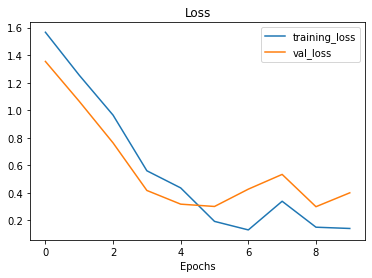

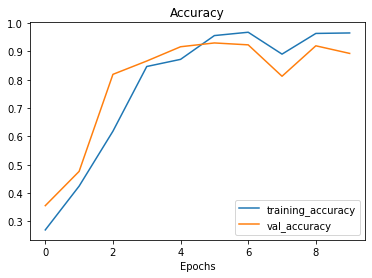

In [ ]:
# Model performance using Graph
plot_loss_curves(model_3_history)

In [ ]:
# Evaluate on test data
model_3.evaluate(X_test, y_test_one_hot)

10/10 [==============================] - 0s 13ms/step - loss: 0.4000 - accuracy: 0.8926


[0.39995044469833374, 0.8926174640655518]

In [ ]:
# Model prediction probabilities
model_3_pred_probs = model_3.predict(X_test)
model_3_pred_probs[:2]

10/10 [==============================] - 0s 11ms/step


array([[2.6325658e-03, 7.6814288e-01, 2.1728265e-01, 9.5784683e-03,
        2.3635172e-03],
       [7.1102672e-06, 9.1401534e-04, 9.9553043e-01, 2.8424241e-08,
        3.5484610e-03]], dtype=float32)

In [ ]:
# Model prediction labels
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([1, 2, 2, 4, 2, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 4, 0, 1, 1, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 2, 0, 3, 0, 0, 2, 3, 4, 1, 0, 1, 4, 3, 2, 2, 0,
       3, 4, 2, 4, 2, 3, 3, 3, 0, 3, 2, 1, 1, 2, 0, 1, 4, 0, 1, 4, 4, 2,
       0, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 0,
       0, 4, 1, 1, 1, 4, 0, 2, 4, 4, 1, 2, 1, 2, 1, 3, 4, 3, 2, 3, 0, 4,
       4, 0, 4, 1, 4, 2, 2, 0, 1, 0, 2, 3, 0, 2, 0, 0, 4, 4, 4, 1, 0, 3,
       1, 3, 0, 4, 1, 1, 0, 1, 0, 1, 4, 3, 1, 2, 2, 4, 2, 2, 3, 0, 2, 3,
       1, 4, 4, 3, 4, 3, 3, 2, 0, 2, 2, 2, 4, 3, 3, 4, 2, 4, 4, 1, 0, 2,
       1, 3, 0, 4, 3, 3, 4, 1, 2, 0, 4, 4, 1, 2, 3, 3, 1, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 4, 3, 4, 4, 0, 0, 3, 1, 0, 1, 3, 2, 2, 3, 4, 2,
       3, 4, 0, 0, 1, 2, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 1,
       1, 1, 0, 2, 1, 1, 3, 2, 2, 1, 4, 3, 2, 4, 1, 3, 4, 0, 2, 2, 4, 4,
       4, 3, 3, 0, 2, 1, 3, 3, 4, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 2, 0, 0,
     

In [ ]:
# Model performance using different evaluation metrics
model_3_results = calculate_results(y_true=y_test_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 89.26174496644296,
 'precision': 0.9021068161973577,
 'recall': 0.8926174496644296,
 'f1': 0.8940163068161983}

### 4.4 GRU Model

In [ ]:
try:
  # Model 4 GRU
  model_4 = tf.keras.Sequential([
      layers.Embedding(max_features,
                      embedding_dims),
      layers.GRU(64, return_sequences=True),
      layers.GRU(64, return_sequences=True),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.GlobalAveragePooling1D(),
      layers.Dense(len(class_names), activation='softmax')
  ])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Compile
try:
  model_4.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         1280000   
                                                                 
 gru (GRU)                   (None, None, 64)          37248     
                                                                 
 gru_1 (GRU)                 (None, None, 64)          24960     
                                                                 
 dense_8 (Dense)             (None, None, 128)         8320      
                                                                 
 dense_9 (Dense)             (None, None, 128)         16512     
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                      

In [ ]:
try:
  tf.random.set_seed(42)
  # Fit train and test sentences and labels
  model_4_history = model_4.fit(X_train,
                                y_train_one_hot,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(X_test,y_test_one_hot),
                                callbacks=[tensorboard_callback(dir_name='Model_Tracking',
                                                                experiment_name='GRU_Model')])
except Exception as e:
  print(f'Error raised!!: {e}') 

Saving TensorBoard log files to : Model_Tracking/GRU_Model/20221118-025750
Epoch 1/10
38/38 [==============================] - 6s 71ms/step - loss: 1.5541 - accuracy: 0.2601 - val_loss: 1.3038 - val_accuracy: 0.3826
Epoch 2/10
38/38 [==============================] - 2s 49ms/step - loss: 1.0793 - accuracy: 0.4698 - val_loss: 0.9654 - val_accuracy: 0.5537
Epoch 3/10
38/38 [==============================] - 2s 46ms/step - loss: 0.7952 - accuracy: 0.6191 - val_loss: 0.8732 - val_accuracy: 0.5906
Epoch 4/10
38/38 [==============================] - 2s 49ms/step - loss: 0.5603 - accuracy: 0.7827 - val_loss: 0.8399 - val_accuracy: 0.7081
Epoch 5/10
38/38 [==============================] - 2s 49ms/step - loss: 0.3207 - accuracy: 0.8977 - val_loss: 0.9504 - val_accuracy: 0.6980
Epoch 6/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1718 - accuracy: 0.9522 - val_loss: 0.8339 - val_accuracy: 0.7450
Epoch 7/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0851

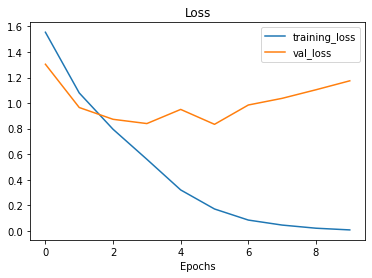

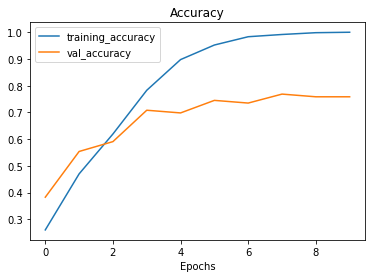

In [ ]:
# Model performance using graph
plot_loss_curves(model_4_history)

In [ ]:
#Evaluate model on test data
model_4.evaluate(X_test, y_test_one_hot)

10/10 [==============================] - 0s 21ms/step - loss: 1.1743 - accuracy: 0.7584


[1.1742557287216187, 0.7583892345428467]

In [ ]:
# model prediction probabilities
model_4_pred_probs = model_4.predict(X_test)
model_4_pred_probs[:5]

10/10 [==============================] - 1s 19ms/step


array([[9.9734938e-01, 6.5317599e-04, 1.9972415e-03, 8.6374530e-19,
        7.6533944e-08],
       [9.5361274e-06, 3.6314237e-23, 9.9979192e-01, 0.0000000e+00,
        1.9853561e-04],
       [8.9503388e-04, 9.3521447e-20, 9.9908972e-01, 0.0000000e+00,
        1.5200736e-05],
       [3.4471719e-27, 0.0000000e+00, 3.2569190e-09, 0.0000000e+00,
        1.0000000e+00],
       [9.7689510e-05, 1.0293297e-16, 9.9236989e-01, 0.0000000e+00,
        7.5323707e-03]], dtype=float32)

In [ ]:
# model prediction labels
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([0, 2, 2, 4, 2, 0, 4, 1, 0, 4, 2, 1, 0, 3, 4, 4, 0, 1, 0, 0, 4, 0,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 2, 0, 1, 1, 4, 3, 2, 2, 0,
       3, 2, 2, 4, 2, 1, 3, 3, 1, 3, 2, 1, 3, 2, 0, 3, 4, 0, 0, 4, 4, 4,
       1, 4, 2, 2, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 1, 3, 3, 3, 0, 3, 3, 0,
       0, 4, 1, 0, 2, 4, 0, 0, 4, 4, 1, 2, 0, 0, 0, 3, 4, 1, 0, 3, 0, 4,
       4, 1, 4, 1, 4, 0, 0, 2, 0, 1, 2, 3, 1, 2, 0, 0, 4, 4, 2, 1, 0, 3,
       0, 3, 2, 2, 1, 3, 0, 1, 0, 1, 4, 3, 1, 2, 2, 4, 2, 0, 3, 0, 2, 3,
       1, 4, 4, 3, 4, 3, 3, 0, 0, 2, 2, 2, 4, 3, 3, 2, 2, 4, 2, 1, 0, 2,
       1, 3, 1, 0, 3, 3, 4, 1, 0, 0, 4, 4, 1, 2, 3, 3, 0, 4, 1, 3, 0, 3,
       3, 0, 1, 2, 3, 1, 2, 3, 4, 4, 0, 2, 3, 2, 0, 1, 3, 0, 2, 3, 4, 2,
       3, 4, 0, 1, 1, 0, 0, 2, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 1,
       0, 1, 0, 2, 1, 3, 3, 0, 1, 0, 4, 1, 2, 4, 3, 3, 4, 2, 0, 2, 2, 4,
       4, 3, 3, 1, 0, 1, 3, 3, 4, 3, 3, 0, 3, 3, 0, 0, 1, 0, 0, 2, 0, 1,
     

In [ ]:
# model performance using different evaluation metrics
model_4_results = calculate_results(y_true=y_test_labels_encoded,
                                    y_pred=model_4_preds)

In [ ]:
model_4_results

{'accuracy': 75.83892617449665,
 'precision': 0.7658019953083536,
 'recall': 0.7583892617449665,
 'f1': 0.7609570753449942}

### 4.5 Bidirectional LSTM

In [ ]:
try:
  # Model 5 Bidirectional LSTM
  model_5  = tf.keras.Sequential([
      layers.Embedding(max_features,
                      embedding_dims),
      layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
      layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.GlobalAveragePooling1D(),
      layers.Dense(len(class_names), activation='softmax')
  ])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
try:
  # Model compile
  model_5.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
except Exception as e:
  print(f'Error raised!!: {e}') 

In [ ]:
# Model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        394240    
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, None, 256)         65792     
                                                                 
 dense_12 (Dense)            (None, None, 256)         65792     
                                                                 
 global_average_pooling1d_3   (None, 256)             

In [ ]:
try:
  # Fit train and test sentences and labels to model
  model_5_history = model_5.fit(X_train,
                                y_train_one_hot,
                                batch_size=batch_size,
                                epochs=epochs,
                                validation_data=(X_test,y_test_one_hot),
                                callbacks=[tensorboard_callback(dir_name='Model_Tracking',
                                                                experiment_name='Bidirectional_Model')])
except Exception as e:
  print(f'Error raised!!: {e}') 

Saving TensorBoard log files to : Model_Tracking/Bidirectional_Model/20221118-025815
Epoch 1/10
38/38 [==============================] - 13s 192ms/step - loss: 1.4336 - accuracy: 0.3247 - val_loss: 1.1800 - val_accuracy: 0.5470
Epoch 2/10
38/38 [==============================] - 6s 148ms/step - loss: 1.0181 - accuracy: 0.5554 - val_loss: 0.8868 - val_accuracy: 0.6074
Epoch 3/10
38/38 [==============================] - 5s 127ms/step - loss: 0.6418 - accuracy: 0.7156 - val_loss: 0.7660 - val_accuracy: 0.6913
Epoch 4/10
38/38 [==============================] - 5s 127ms/step - loss: 0.3670 - accuracy: 0.8666 - val_loss: 0.7977 - val_accuracy: 0.7315
Epoch 5/10
38/38 [==============================] - 5s 131ms/step - loss: 0.2967 - accuracy: 0.9086 - val_loss: 0.8319 - val_accuracy: 0.7081
Epoch 6/10
38/38 [==============================] - 5s 128ms/step - loss: 0.2086 - accuracy: 0.9346 - val_loss: 0.8770 - val_accuracy: 0.7181
Epoch 7/10
38/38 [==============================] - 5s 126ms/s

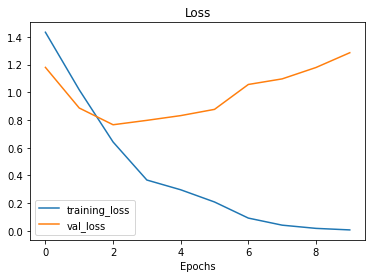

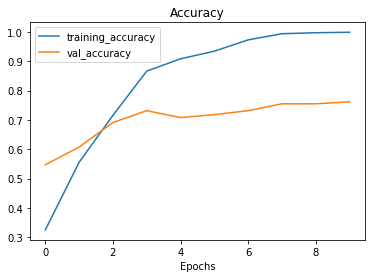

In [ ]:
# Model performance using graph
plot_loss_curves(model_5_history)

In [ ]:
# Evaluate test data 
model_5.evaluate(X_test, y_test_one_hot)

10/10 [==============================] - 0s 47ms/step - loss: 1.2858 - accuracy: 0.7617


[1.2857506275177002, 0.7617449760437012]

In [ ]:
# Model prediction probabilities
model_5_pred_probs = model_5.predict(X_test)
model_5_pred_probs[:5]

10/10 [==============================] - 2s 46ms/step


array([[9.5407301e-01, 4.4631783e-02, 1.2951950e-03, 2.7253805e-12,
        4.7572861e-09],
       [4.5642358e-07, 9.4499990e-27, 9.9999559e-01, 0.0000000e+00,
        3.8943981e-06],
       [2.7827657e-04, 1.1388220e-21, 9.9972171e-01, 0.0000000e+00,
        4.5354430e-08],
       [3.0788410e-28, 0.0000000e+00, 1.5104823e-06, 0.0000000e+00,
        9.9999845e-01],
       [2.8783732e-05, 4.7159216e-16, 9.9443048e-01, 2.4662586e-37,
        5.5406909e-03]], dtype=float32)

In [ ]:
# Model prediction labels
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(298,), dtype=int64, numpy=
array([0, 2, 2, 4, 2, 0, 4, 1, 0, 4, 2, 0, 0, 3, 4, 4, 0, 1, 0, 0, 4, 1,
       3, 0, 3, 4, 0, 3, 4, 0, 3, 0, 0, 2, 3, 0, 0, 1, 1, 2, 3, 2, 2, 0,
       3, 2, 2, 2, 0, 1, 3, 3, 1, 3, 2, 1, 3, 2, 0, 1, 4, 0, 0, 4, 4, 4,
       1, 4, 2, 0, 2, 3, 3, 3, 1, 1, 0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0,
       0, 4, 1, 0, 0, 4, 0, 0, 4, 4, 1, 2, 1, 2, 1, 3, 4, 3, 0, 3, 0, 4,
       2, 1, 4, 1, 4, 0, 2, 2, 0, 1, 2, 3, 0, 2, 0, 0, 4, 2, 2, 1, 0, 3,
       0, 3, 2, 2, 0, 3, 0, 1, 0, 1, 4, 3, 0, 2, 2, 4, 2, 0, 3, 0, 2, 3,
       1, 4, 2, 3, 4, 3, 3, 2, 0, 2, 2, 0, 4, 3, 3, 2, 2, 4, 2, 1, 0, 2,
       1, 3, 1, 0, 3, 3, 4, 1, 0, 0, 4, 2, 1, 2, 3, 3, 0, 4, 3, 3, 2, 3,
       3, 0, 1, 2, 3, 1, 2, 3, 4, 2, 0, 2, 3, 2, 0, 3, 3, 0, 2, 3, 4, 2,
       3, 4, 0, 1, 1, 0, 0, 0, 4, 2, 2, 3, 3, 0, 0, 4, 0, 3, 3, 2, 2, 0,
       1, 3, 0, 0, 1, 3, 3, 0, 1, 0, 4, 1, 2, 4, 3, 3, 2, 0, 0, 2, 2, 4,
       4, 3, 3, 0, 2, 1, 3, 3, 4, 3, 3, 0, 3, 3, 0, 0, 1, 0, 0, 2, 1, 0,
     

In [ ]:
# Model evaluation
model_5_results = calculate_results(y_true=y_test_labels_encoded,
                                    y_pred=model_5_preds)

In [ ]:
model_5_results

{'accuracy': 76.1744966442953,
 'precision': 0.7749932946775469,
 'recall': 0.761744966442953,
 'f1': 0.7634408369912693}

## 5.Comparing All Model Results

In [ ]:
# Dataframe contain all model results
all_model_results = pd.DataFrame({"Baseline": baseline_results,
                                  "Simple_dense": model_1_results,
                                  "Conv1D": model_2_results,
                                  "LSTM": model_3_results,
                                  "GRU": model_4_results,
                                  "Bidirectional": model_5_results
                                  })


In [ ]:
# Check model results
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Baseline,95.637584,0.957846,0.956376,0.956246
Simple_dense,90.268456,0.907635,0.902685,0.903972
Conv1D,97.315436,0.973837,0.973154,0.973240
LSTM,89.261745,0.902107,0.892617,0.894016
GRU,75.838926,0.765802,0.758389,0.760957
Bidirectional,76.174497,0.774993,0.761745,0.763441


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

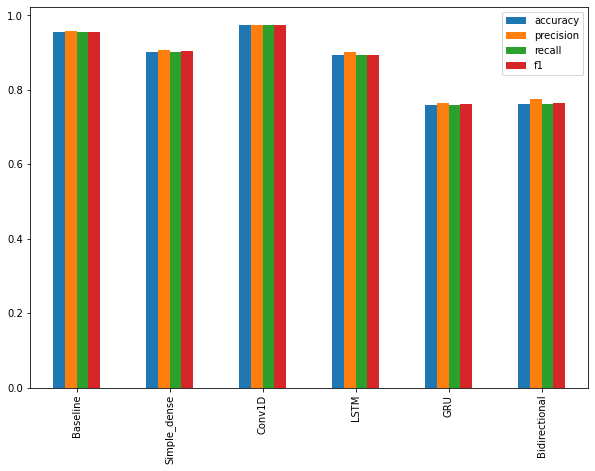

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

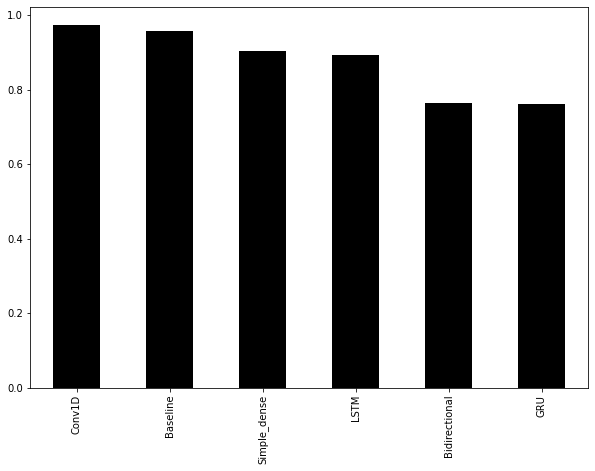

In [ ]:
# Model performance using 'f1' score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7),color='black');

## 6 Model Tracking using Tensorboard

In [ ]:
# !tensorboard dev upload --logdir Model_Tracking/\
#    --name "News Classification models "

## 7.Save and Load best performing model

In [ ]:
# Save model
model_2.save('CNN1d.h5')
model_2.save_weights('CNN_weights.h5')

In [ ]:
# load model
load_model =tf.keras.models.load_model('CNN1d.h5')
# Summary
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 593, 128)          1280000   
                                                                 
 dropout (Dropout)           (None, 593, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 591, 250)          96250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 250)               62750     
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                      

In [ ]:
load_model.evaluate(X_test, y_test_one_hot)

10/10 [==============================] - 0s 5ms/step - loss: 0.0750 - accuracy: 0.9732


[0.07495981454849243, 0.9731543660163879]

## 8.Finding saved model performance of Test dataset

In [ ]:
# test dataset
test_df = pd.read_csv('BBC News Test.csv')

# Check head
test_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [ ]:
# Check test dataframe shape
test_df.shape

(735, 2)

In [ ]:
# Any null values
test_df.isna().sum()

ArticleId    0
Text         0
dtype: int64

In [ ]:
import json
import random
from keras_preprocessing.text import tokenizer_from_json
#example = 'RRR 2 movie confirms by director Rajamouli'
try:
  test_sentences = test_df['Text'].to_list()
  test_samples = random.sample(test_sentences, 5)
  for test_sample in test_samples:
    message = preprocess_text(str(test_sample))
    input = [message]
    with open('tokenizer.json') as f:
      data = json.load(f)
      tokenizer = tokenizer_from_json(data)
    input_sequences = tokenizer.texts_to_sequences(input)
    input_pad = pad_sequences(input_sequences, padding='post', maxlen=output_seq_len)
    pred_probs = load_model.predict(input_pad)
    preds = tf.argmax(pred_probs, axis=1)
    print(f"Pred: {preds}, label: {class_names[preds]}")
    print(f"Text:\n{test_sample}\n")
    print("---------------------------------------------------------\n")
except Exception as e:
  print(f'Error raised!!: {e}') 


1/1 [==============================] - 0s 73ms/step
Pred: [3], label: sport
Text:
wilkinson fit to face edinburgh england captain jonny wilkinson will make his long-awaited return from injury against edinburgh on saturday.  wilkinson  who has not played since injuring his bicep on 17 october  took part in full-contact training with newcastle falcons on wednesday. and the 25-year-old fly-half will start saturday s heineken cup match at murrayfield on the bench. but newcastle director of rugby rob andrew said:  he s fine and we hope to get him into the game at some stage.  the 25-year-old missed england s autumn internationals after aggravating the haematoma in his upper right arm against saracens. he was subsequently replaced as england captain by full-back jason robinson. sale s charlie hodgson took over the number 10 shirt in the internationals against canada  south africa and australia. wilkinson s year has been disrupted by injury as his muscle problem followed eight months on the s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Pred: [2], label: politics
Text:
brown visits slum on africa trip chancellor gordon brown has visited kenya s biggest shantytown as he opened a week-long visit to africa.  mr brown s trip is designed to highlight how the uk wants to make africa s problems a priority of its chairmanship of the g8 this year. he will see an hiv/aids orphanage in tanzania and a women s credit union in mozambique before chairing a meeting of the commission for africa in cape town. at slums in narobi on wednesday  he said education needs had to be tackled.  speaking outside the olympic primary school  mr brown said:  it is simply not acceptable in the modern age for the rest of the world to stand by and have hundreds of millions of children not getting the chance at education.  he pointed to international plans to invest $10bn for education in africa over the next decade. the school is on the edge of kibera  where 800 000 live often in huts made of mud  scrap metal and cardboard. mr brown s aides say he want

## 9.Finding most wrong predictions

In [ ]:
val_df = pd.DataFrame({'Text': X_test_sent,
                      'Target': y_test_labels_encoded,
                      'Pred': model_2_preds})

In [ ]:
val_df

,Text,Target,Pred
0,wal mart is sued over rude lyrics the parents ...,1,1
1,howard taunts blair over splits tony blair feu...,2,2
2,fox attacks blair tory lies tony blair lied wh...,2,2
3,online commons to spark debate online communit...,4,4
4,piero gives rugby perspective bbc sport unveil...,4,4
...,...,...,...
293,us crude prices surge above us crude prices ha...,0,0
294,saudi ministry to employ women women will be e...,0,2
295,label withdraws mcfadden video the new video o...,1,1
296,california sets fines for spyware the makers o...,4,4


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["Target"] != val_df["Pred"]]

In [ ]:
most_wrong

,Text,Target,Pred
12,russia wto talks make progress talks on russia...,0,2
117,us to probe airline travel chaos the us govern...,0,2
163,pc ownership to double by the number of person...,4,0
187,ink helps drive democracy in asia the kyrgyz r...,4,2
249,us box office set for record high ticket sales...,1,0
250,hatfield executives go on trial engineering fi...,2,0
262,portable playstation ready to go sony playstat...,4,1
294,saudi ministry to employ women women will be e...,0,2


In [ ]:
len(most_wrong)

8